# Black Friday Sales Prediction

This dataset comprises of sales transactions captured at a retail store. This is a regression problem. The dataset has 550,069 rows and 12 columns.

*Problem: Predict purchase amount.*

**Data Overview**

Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

* User_ID: Unique ID of the user.

* Product_ID: Unique ID of the product. 

* Gender: indicates the gender of the person making the transaction.

* Age: indicates the age group of the person making the transaction.

* Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

* City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

* Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

* Marital_Status: is 0 if the user is not married and 1 otherwise.

* Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

* Purchase: Purchase amount.

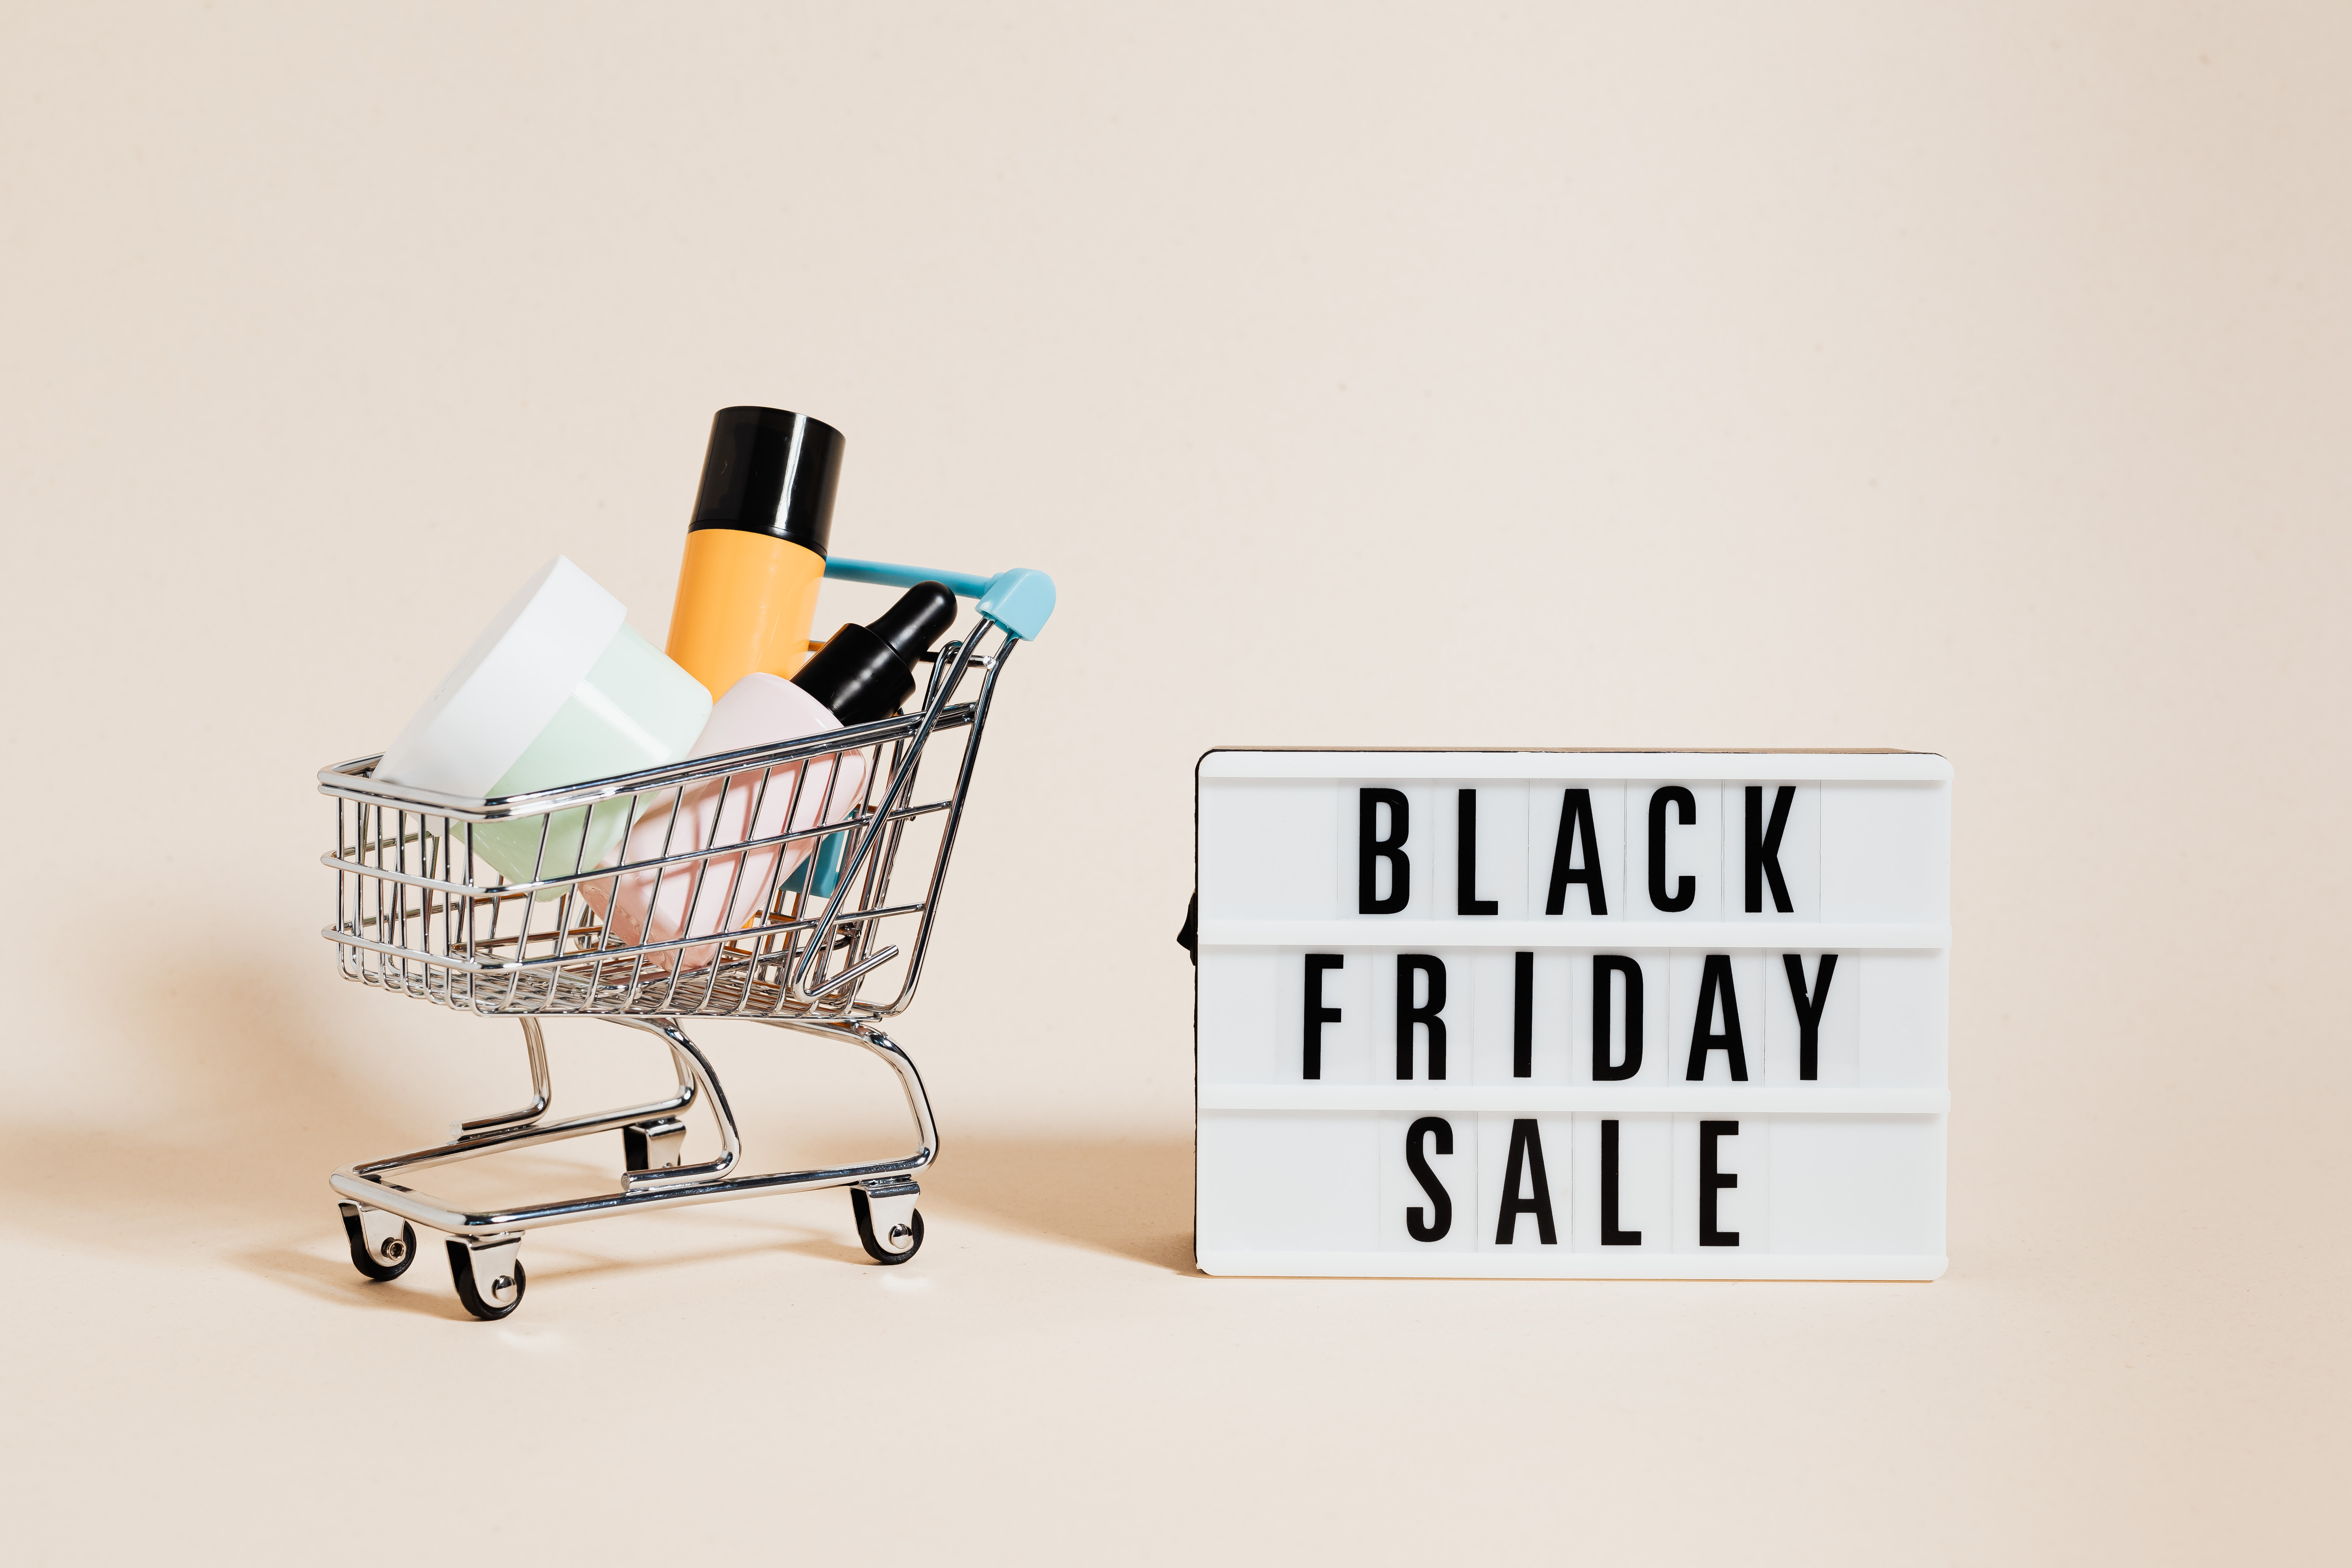

# MongoDB

## Installing MongoDB

In [ ]:
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

In [ ]:
!apt install mongodb > /dev/null

In [ ]:
!service mongodb start

 * Starting database mongodb
   ...done.


In [ ]:
mongoURI = "mongodb://localhost:27017/"
client = MongoClient(mongoURI)
client.list_database_names() 

['admin', 'config', 'local']

## Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [ ]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


## Treating Null Values through Numpy and Pandas

Not all functions can be done on pyMongo so I have to create a dataframe from pandas and this can help me in Describing the dataset and finding the null values and many more

In [ ]:
data = pd.read_csv("train.csv")

Text(0.5, 1.0, 'our missing values')

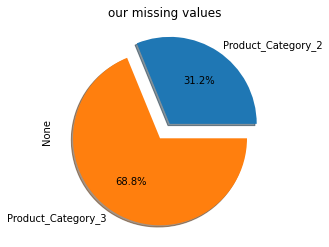

In [ ]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values')

In [ ]:
# Null Values in Dataframe
missing_values=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


Only Product_Category_2 and Product_Category_3 have null values which is good news. However Product_Category_3 is null for nearly 70% of transactions so it can't give us much information. so I gonna drop Product_Category_3

In [ ]:
# Value Counts of Product Category 2
data.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [ ]:
# Describe in Product Category
data.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [ ]:
# Replace using median 
median = data['Product_Category_2'].median()
data['Product_Category_2'].fillna(median, inplace=True)

In [ ]:
# Value counts of Product Category 3
data.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [ ]:
# drop Product_Category_3 
data=data.drop('Product_Category_3',axis=1)

In [ ]:
data.to_csv("Clean_Data.csv")

## Creating CSV file to MongoDB collection

In [ ]:
import csv
import json

In [ ]:
def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)

In [ ]:
csvFilePath = r'Clean_Data.csv'
jsonFilePath = r'Data.json'
csv_to_json(csvFilePath, jsonFilePath)

In [ ]:
db = client.BDSN
db.create_collection("Project")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'BDSN'), 'Project')

In [ ]:
!mongoimport --uri "{mongoURI}"  --collection "Project"  --drop --file "Data.json" --jsonArray

2023-02-05T08:13:42.694+0000	connected to: localhost
2023-02-05T08:13:42.695+0000	dropping: test.Project
2023-02-05T08:13:45.694+0000	[#####...................] test.Project	44.9MB/198MB (22.6%)
2023-02-05T08:13:48.698+0000	[##########..............] test.Project	90.4MB/198MB (45.6%)
2023-02-05T08:13:51.693+0000	[################........] test.Project	137MB/198MB (69.0%)
2023-02-05T08:13:54.694+0000	[######################..] test.Project	183MB/198MB (92.5%)
2023-02-05T08:13:55.671+0000	[########################] test.Project	198MB/198MB (100.0%)
2023-02-05T08:13:55.671+0000	imported 550068 documents


In [ ]:
mongoURI = mongoURI
client = MongoClient(mongoURI)
client.list_database_names()

['BDSN', 'admin', 'config', 'local', 'test']

In [ ]:
db = client.test
db.list_collection_names()

['Project']

## EDA through pyMongo

### EDA

In [ ]:
table = db.Project
table.count_documents({})
# Total number of rows in dataframe is 550068.

550068

In [ ]:
#display 5 the documents in the collection assignments
c1 = table.find().limit(5)
for i in c1:
    print(i)

{'_id': ObjectId('63df65366691a45d4ff7829d'), '': '1', 'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'_id': ObjectId('63df65366691a45d4ff7829e'), '': '2', 'User_ID': '1000001', 'Product_ID': 'P00087842', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': '9.0', 'Purchase': '1422'}
{'_id': ObjectId('63df65366691a45d4ff7829f'), '': '0', 'User_ID': '1000001', 'Product_ID': 'P00069042', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '9.0', 'Purchase': '8370'}
{'_id': ObjectId('63df65366691a45d4ff782a0'), '': '3', 'User_ID': '1

In [ ]:
# Creating Dataframe
df = pd.DataFrame(list(table.find({},{"_id":0})))
df.head()

,,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
1,2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
2,0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


In [ ]:
table.find_one()

{'_id': ObjectId('63df65366691a45d4ff7829d'),
 '': '1',
 'User_ID': '1000001',
 'Product_ID': 'P00248942',
 'Gender': 'F',
 'Age': '0-17',
 'Occupation': '10',
 'City_Category': 'A',
 'Stay_In_Current_City_Years': '2',
 'Marital_Status': '0',
 'Product_Category_1': '1',
 'Product_Category_2': '6.0',
 'Purchase': '15200'}

In [ ]:
# Columns in Dataframe
list_columns = df.columns

for i in list_columns[1:]:
  print(i)

User_ID
Product_ID
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category_1
Product_Category_2
Purchase


In [ ]:
# Number of Columns in Dataframe
len(list_columns)

12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0                               550068 non-null  object
 1   User_ID                     550068 non-null  object
 2   Product_ID                  550068 non-null  object
 3   Gender                      550068 non-null  object
 4   Age                         550068 non-null  object
 5   Occupation                  550068 non-null  object
 6   City_Category               550068 non-null  object
 7   Stay_In_Current_City_Years  550068 non-null  object
 8   Marital_Status              550068 non-null  object
 9   Product_Category_1          550068 non-null  object
 10  Product_Category_2          550068 non-null  object
 11  Purchase                    550068 non-null  object
dtypes: object(12)
memory usage: 50.4+ MB


Text(0.5, 1.0, 'type of our data')

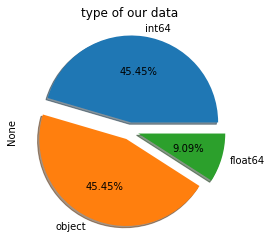

In [ ]:
data.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data')

In [ ]:
# show the numirical Variables

num_columns = [f for f in data.columns if data.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
for i in num_columns:
  print(i)

Occupation
Marital_Status
Product_Category_1
Product_Category_2


In [ ]:
# show the categorical values

cat_columns = [f for f in data.columns if data.dtypes[f] == 'object']
for i in cat_columns:
  print(i)

Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years


In [ ]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.576434,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,4.226025,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,8.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,12054.000000


**A basic observation is that:**

1. Product P00265242 is the most popular product.
2. Most of the transactions were made by men.
3. Age group with most transactions was 26-35.
4. City Category with most transactions was B

In [ ]:
# null value
print("Null Values:")
for i in list_columns[1:]:
    print(i,":", table.count_documents({"{}".format(i): "none"}))

Null Values:
User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category_1 : 0
Product_Category_2 : 0
Purchase : 0


No null values left

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f301ebc5cd0>,
      dtype=object)

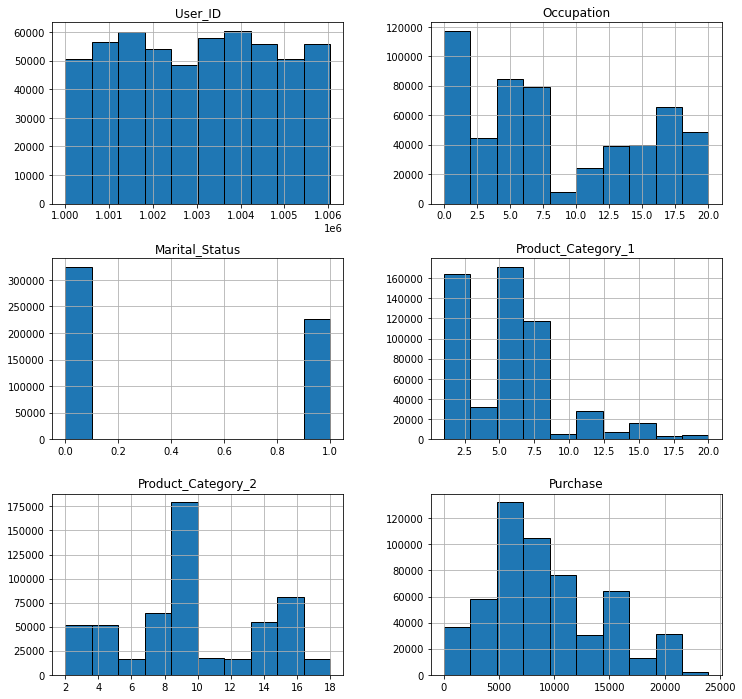

In [ ]:
data.hist(edgecolor='black',figsize=(12,12))

### Descriptive Analysis

#### User ID

Checking how many Unique Users are

In [ ]:
# Distinct Values in Users
list1 = []
for i in table.find().distinct('User_ID'):
    list1.append(i)
len(list1)

5891

In [ ]:
# To check null values in Users
table.count_documents({"User_ID" : "none"})

0

In [ ]:
data["User_ID"].describe()

count    5.500680e+05
mean     1.003029e+06
std      1.727592e+03
min      1.000001e+06
25%      1.001516e+06
50%      1.003077e+06
75%      1.004478e+06
max      1.006040e+06
Name: User_ID, dtype: float64

In [ ]:
data["User_ID"].mode()[0]

1001680

1001680 - UserID is the one who did highest frequency of purchase in Black Friday Sales

In [ ]:
c1 = table.find({"User_ID": "1001680"}).limit(5)
for crnt in c1:
    print(crnt)

{'_id': ObjectId('63df65366691a45d4ff7add7'), '': '11056', 'User_ID': '1001680', 'Product_ID': 'P00130642', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '1', 'Product_Category_1': '11', 'Product_Category_2': '16.0', 'Purchase': '6139'}
{'_id': ObjectId('63df65366691a45d4ff7add8'), '': '11057', 'User_ID': '1001680', 'Product_ID': 'P00105442', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '1', 'Product_Category_1': '11', 'Product_Category_2': '9.0', 'Purchase': '7607'}
{'_id': ObjectId('63df65366691a45d4ff7add9'), '': '11058', 'User_ID': '1001680', 'Product_ID': 'P00245642', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '1', 'Product_Category_1': '5', 'Product_Category_2': '11.0', 'Purchase': '8715'}
{'_id': ObjectId('63df65366691a45d4ff7adda'), '': '

In [ ]:
data.loc[data['User_ID'] == 1001680].Purchase.sum()

8699596

 *The Loyal Customer*




**User ID : 1001680 ~ Purchase Amount : 8699596** has max frequency.

In [ ]:
data["Purchase"].max()

23961

In [ ]:
nuser = data.groupby('User_ID')['Purchase'].sum()

In [ ]:
len(nuser)

5891

In [ ]:
nuser

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

In [ ]:
users_data = pd.DataFrame(nuser)

In [ ]:
users_data["User_ID"] = users_data.index

In [ ]:
users_data.head()

,Purchase,User_ID
User_ID,,
1000001,334093,1000001
1000002,810472,1000002
1000003,341635,1000003
1000004,206468,1000004
1000005,821001,1000005


In [ ]:
users_data.reset_index(drop = True, inplace = True)

In [ ]:
users_data.columns = ["Purchase_Amount","User_ID"]

In [ ]:
users_data.head()

,Purchase_Amount,User_ID
0,334093,1000001
1,810472,1000002
2,341635,1000003
3,206468,1000004
4,821001,1000005


In [ ]:
users_data.loc[users_data['Purchase_Amount'].idxmax()]

Purchase_Amount    10536909
User_ID             1004277
Name: 4166, dtype: int64

*The Whale Customer*


**User_ID : 1004277 ~ Purchase_Amount : 10536909** has the maximum Purchase.

In [ ]:
# display all the documents in the collection assignment where specific UserID 
c1 = table.find({"User_ID": "1004277"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1004277', 'Product_ID': 'P00034742', 'Gender': 'M', 'Age': '36-45', 'Occupation': '16', 'City_Category': 'A', 'Stay_In_Current_City_Years': '0', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '14.0', 'Purchase': '8763'}
{'User_ID': '1004277', 'Product_ID': 'P00028542', 'Gender': 'M', 'Age': '36-45', 'Occupation': '16', 'City_Category': 'A', 'Stay_In_Current_City_Years': '0', 'Marital_Status': '0', 'Product_Category_1': '6', 'Product_Category_2': '8.0', 'Purchase': '20400'}
{'User_ID': '1004277', 'Product_ID': 'P00116842', 'Gender': 'M', 'Age': '36-45', 'Occupation': '16', 'City_Category': 'A', 'Stay_In_Current_City_Years': '0', 'Marital_Status': '0', 'Product_Category_1': '2', 'Product_Category_2': '5.0', 'Purchase': '16070'}
{'User_ID': '1004277', 'Product_ID': 'P00063342', 'Gender': 'M', 'Age': '36-45', 'Occupation': '16', 'City_Category': 'A', 'Stay_In_Current_City_Years': '0', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_

#### Product ID

In [ ]:
# Distinct Values in Product ID
list1 = []
for i in table.find().distinct('Product_ID'):
    list1.append(i)
len(list1)

3631

In [ ]:
# To check null values in Product ID
table.count_documents({"Product ID" : "none"})

0

In [ ]:
data["Product_ID"].mode()[0]

'P00265242'

*Most Demanded Product*

**Product ID : P00265242** is the favourite Product and has frequency of 1880.

In [ ]:
# display all the documents in the collection assignment where specific Product ID
c1 = table.find({"Product_ID": "P00265242"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000066', 'Product_ID': 'P00265242', 'Gender': 'M', 'Age': '26-35', 'Occupation': '18', 'City_Category': 'C', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '8.0', 'Purchase': '8652'}
{'User_ID': '1000196', 'Product_ID': 'P00265242', 'Gender': 'F', 'Age': '36-45', 'Occupation': '9', 'City_Category': 'C', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '8.0', 'Purchase': '8767'}
{'User_ID': '1000222', 'Product_ID': 'P00265242', 'Gender': 'M', 'Age': '26-35', 'Occupation': '1', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '8.0', 'Purchase': '6944'}
{'User_ID': '1000301', 'Product_ID': 'P00265242', 'Gender': 'M', 'Age': '18-25', 'Occupation': '4', 'City_Category': 'B', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': 

In [ ]:
data.Product_ID.describe()

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object

In [ ]:
data.loc[data['Purchase'].idxmax()][["Product_ID", "Purchase"]]

Product_ID    P00052842
Purchase          23961
Name: 87440, dtype: object

*High End Product*

**Product ID : P00052842** has the Expensive Product with **Amount 23961**.

In [ ]:
# display all the documents in the collection assignment where specific Product ID
c1 = table.find({"Product_ID": "P00052842"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000175', 'Product_ID': 'P00052842', 'Gender': 'F', 'Age': '26-35', 'Occupation': '2', 'City_Category': 'B', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '10', 'Product_Category_2': '15.0', 'Purchase': '23341'}
{'User_ID': '1000259', 'Product_ID': 'P00052842', 'Gender': 'M', 'Age': '26-35', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '10', 'Product_Category_2': '15.0', 'Purchase': '18886'}
{'User_ID': '1000326', 'Product_ID': 'P00052842', 'Gender': 'M', 'Age': '51-55', 'Occupation': '11', 'City_Category': 'B', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '10', 'Product_Category_2': '15.0', 'Purchase': '18440'}
{'User_ID': '1000412', 'Product_ID': 'P00052842', 'Gender': 'M', 'Age': '36-45', 'Occupation': '15', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '10', 'Product_Cat

In [ ]:
data.loc[data['Purchase'].idxmin()][["Product_ID", "Purchase"]]

Product_ID    P00370293
Purchase             12
Name: 545946, dtype: object

*Cheapest Product*

**Product ID : P00370293** has the Expensive Product with **Amount 12**.

In [ ]:
# display all the documents in the collection assignment where specific Product ID
c1 = table.find({"Product_ID": "P00370293"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000008', 'Product_ID': 'P00370293', 'Gender': 'M', 'Age': '26-35', 'Occupation': '12', 'City_Category': 'C', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '1', 'Product_Category_1': '19', 'Product_Category_2': '9.0', 'Purchase': '48'}
{'User_ID': '1000010', 'Product_ID': 'P00370293', 'Gender': 'F', 'Age': '36-45', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '1', 'Product_Category_1': '19', 'Product_Category_2': '9.0', 'Purchase': '24'}
{'User_ID': '1000016', 'Product_ID': 'P00370293', 'Gender': 'F', 'Age': '36-45', 'Occupation': '0', 'City_Category': 'C', 'Stay_In_Current_City_Years': '0', 'Marital_Status': '1', 'Product_Category_1': '19', 'Product_Category_2': '9.0', 'Purchase': '62'}
{'User_ID': '1000024', 'Product_ID': 'P00370293', 'Gender': 'F', 'Age': '26-35', 'Occupation': '7', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '1', 'Product_Category_1': '19', 'Product_Category_2': '9

#### Gender

In [ ]:
# display all the documents in the collection assignment where Gender is Male
c1 = table.find({"Gender": "M"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000002', 'Product_ID': 'P00285442', 'Gender': 'M', 'Age': '55+', 'Occupation': '16', 'City_Category': 'C', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '7969'}
{'User_ID': '1000003', 'Product_ID': 'P00193542', 'Gender': 'M', 'Age': '26-35', 'Occupation': '15', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '2.0', 'Purchase': '15227'}
{'User_ID': '1000004', 'Product_ID': 'P00184942', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '8.0', 'Purchase': '19215'}
{'User_ID': '1000004', 'Product_ID': 'P00346142', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': 

In [ ]:
# display all the documents in the collection assignment where Gender is Female
c1 = table.find({"Gender": "F"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'User_ID': '1000001', 'Product_ID': 'P00087842', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': '9.0', 'Purchase': '1422'}
{'User_ID': '1000001', 'Product_ID': 'P00069042', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '9.0', 'Purchase': '8370'}
{'User_ID': '1000001', 'Product_ID': 'P00085442', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': 

In [ ]:
# To check null values in Gender
table.count_documents({"Gender" : "none"})

0

In [ ]:
# Distinct Values in Gender
list1 = []
for i in table.find().distinct('Gender'):
    list1.append(i)
for i in list1:
  print(i)

F
M


In [ ]:
data.Gender.describe()

count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

In [ ]:
# Value Counts
print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Gender": "{}".format(i)}))

Unique Values: 
F : 135809
M : 414259


In [ ]:
# Mode in Gender is Male shows with their Count
Gender_mode = max((table.count_documents({"Gender" : "F"})),table.count_documents({"Gender" : "M"}))
print("Mode -", "Male", (Gender_mode))

Mode - Male 414259


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


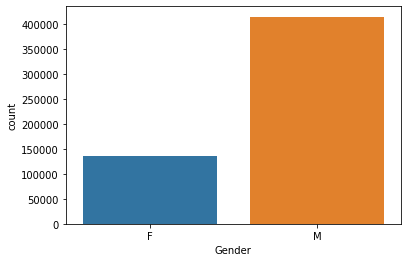

In [ ]:
sns.countplot(df['Gender'])
plt.show()

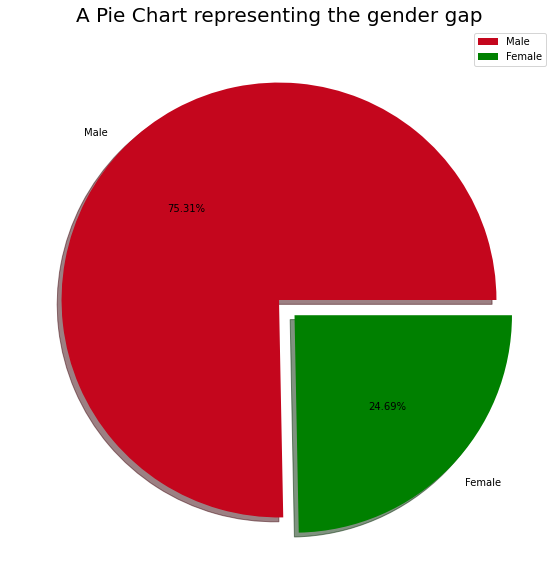

In [ ]:
# pie chart 

size = data['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

On average the male gender spends more money on purchase contrary to female.

#### Age

In [ ]:
# Distinct Values in Age
list1 = []
for i in table.find().distinct('Age'):
    list1.append(i)
print("Categories in Age Variable", len(list1))
for i in list1:
  print(i)

Categories in Age Variable 7
0-17
55+
26-35
46-50
51-55
36-45
18-25


In [ ]:
# Unique Values in Age

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Age": "{}".format(i)}))

Unique Values: 
0-17 : 15102
55+ : 21504
26-35 : 219587
46-50 : 45701
51-55 : 38501
36-45 : 110013
18-25 : 99660


In [ ]:
# display all the documents in the collection assignment where Age is 0-17
c1 = table.find({"Age": "0-17"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'User_ID': '1000001', 'Product_ID': 'P00087842', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': '9.0', 'Purchase': '1422'}
{'User_ID': '1000001', 'Product_ID': 'P00069042', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '9.0', 'Purchase': '8370'}
{'User_ID': '1000001', 'Product_ID': 'P00085442', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': 

In [ ]:
# display all the documents in the collection assignment where Age is 55+
c1 = table.find({"Age": "55+"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000002', 'Product_ID': 'P00285442', 'Gender': 'M', 'Age': '55+', 'Occupation': '16', 'City_Category': 'C', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '7969'}
{'User_ID': '1000031', 'Product_ID': 'P00117442', 'Gender': 'M', 'Age': '55+', 'Occupation': '7', 'City_Category': 'C', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '14.0', 'Purchase': '8596'}
{'User_ID': '1000031', 'Product_ID': 'P00322042', 'Gender': 'M', 'Age': '55+', 'Occupation': '7', 'City_Category': 'C', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '8.0', 'Purchase': '5248'}
{'User_ID': '1000031', 'Product_ID': 'P00216342', 'Gender': 'M', 'Age': '55+', 'Occupation': '7', 'City_Category': 'C', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '4.0', '

In [ ]:
# display all the documents in the collection assignment where Age is 26-35
c1 = table.find({"Age": "26-35"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000003', 'Product_ID': 'P00193542', 'Gender': 'M', 'Age': '26-35', 'Occupation': '15', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '2.0', 'Purchase': '15227'}
{'User_ID': '1000005', 'Product_ID': 'P00274942', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '7871'}
{'User_ID': '1000005', 'Product_ID': 'P00014542', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '3957'}
{'User_ID': '1000005', 'Product_ID': 'P00251242', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '5', 'Product_Category_2'

In [ ]:
# display all the documents in the collection assignment where Age is 46-50
c1 = table.find({"Age": "46-50"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000004', 'Product_ID': 'P00184942', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '8.0', 'Purchase': '19215'}
{'User_ID': '1000004', 'Product_ID': 'P00346142', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '15.0', 'Purchase': '15854'}
{'User_ID': '1000004', 'Product_ID': 'P0097242', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '16.0', 'Purchase': '15686'}
{'User_ID': '1000013', 'Product_ID': 'P00140742', 'Gender': 'M', 'Age': '46-50', 'Occupation': '1', 'City_Category': 'C', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2':

In [ ]:
# display all the documents in the collection assignment where Age is 51-55
c1 = table.find({"Age": "51-55"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000006', 'Product_ID': 'P00190242', 'Gender': 'F', 'Age': '51-55', 'Occupation': '9', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '4', 'Product_Category_2': '5.0', 'Purchase': '2079'}
{'User_ID': '1000006', 'Product_ID': 'P0096642', 'Gender': 'F', 'Age': '51-55', 'Occupation': '9', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '2', 'Product_Category_2': '3.0', 'Purchase': '13055'}
{'User_ID': '1000006', 'Product_ID': 'P00058442', 'Gender': 'F', 'Age': '51-55', 'Occupation': '9', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '14.0', 'Purchase': '8851'}
{'User_ID': '1000006', 'Product_ID': 'P00231342', 'Gender': 'F', 'Age': '51-55', 'Occupation': '9', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '8

In [ ]:
# display all the documents in the collection assignment where Age is 36-45
c1 = table.find({"Age": "36-45"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000007', 'Product_ID': 'P00036842', 'Gender': 'M', 'Age': '36-45', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '14.0', 'Purchase': '11788'}
{'User_ID': '1000010', 'Product_ID': 'P00118742', 'Gender': 'F', 'Age': '36-45', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '1', 'Product_Category_1': '5', 'Product_Category_2': '11.0', 'Purchase': '8886'}
{'User_ID': '1000010', 'Product_ID': 'P00297942', 'Gender': 'F', 'Age': '36-45', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '1', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '5875'}
{'User_ID': '1000010', 'Product_ID': 'P00085942', 'Gender': 'F', 'Age': '36-45', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '1', 'Product_Category_1': '2', 'Product_Category_2

In [ ]:
# display all the documents in the collection assignment where Age is 18-25
c1 = table.find({"Age": "18-25"},{"User_ID" : 1,
"Product_ID" : 1, "Gender" : 1,
"Age" : 1,
"Occupation" : 1,
"City_Category" : 1,
"Stay_In_Current_City_Years" : 1,
"Marital_Status" : 1,
"Product_Category_1" : 1,
"Product_Category_2" : 1,
"Purchase" : 1, "_id" : 0}).limit(5)
for crnt in c1:
    print(crnt)

{'User_ID': '1000018', 'Product_ID': 'P00190742', 'Gender': 'F', 'Age': '18-25', 'Occupation': '3', 'City_Category': 'B', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '4.0', 'Purchase': '10754'}
{'User_ID': '1000018', 'Product_ID': 'P00151842', 'Gender': 'F', 'Age': '18-25', 'Occupation': '3', 'City_Category': 'B', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '4', 'Product_Category_2': '8.0', 'Purchase': '2802'}
{'User_ID': '1000018', 'Product_ID': 'P00366542', 'Gender': 'F', 'Age': '18-25', 'Occupation': '3', 'City_Category': 'B', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '5', 'Product_Category_2': '9.0', 'Purchase': '1780'}
{'User_ID': '1000018', 'Product_ID': 'P00112642', 'Gender': 'F', 'Age': '18-25', 'Occupation': '3', 'City_Category': 'B', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '2

In [ ]:
# To check null values in Age
table.count_documents({"Age" : "none"})

0

In [ ]:
data["Age"].mode()[0]

'26-35'

In [ ]:
data.loc[data['Age'] == "26-35"].Purchase.sum()

2031770578

*Maximum orders*  

**Age : 16-35 ~ Purchase : 2031770578** is the category of Age where purchase frequency is maximum

In [ ]:
min(list1) 

'0-17'

*Minimum orders and Purchase*  

**Age : 0-17 ~ Purchase : 134913183** is the category of Age where purchase frequency is minimum and purchase amount is also minimum

In [ ]:
list2 = []
for i in list1:
  list2.append(data.loc[data['Age'] == "{}".format(i)].Purchase.sum())

In [ ]:
res = dict(zip(list1,list2))
for k, v in res.items():
    print(k, ":", v)

0-17 : 134913183
55+ : 200767375
26-35 : 2031770578
46-50 : 420843403
51-55 : 367099644
36-45 : 1026569884
18-25 : 913848675


In [ ]:
# find the minimum
min(res.items(), key=lambda x: x[1])

('0-17', 134913183)

In [ ]:
# find the maximum
max(res.items(), key=lambda x: x[1])

('26-35', 2031770578)

*Maximum Purchase*  

**Age : 26-35 ~ Purchase : 2031770578** is the category of Age where purchase is maximum

In [ ]:
data.Age.describe()

count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [ ]:
ageData = sorted(list(zip(data.Age.value_counts().index, data.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data1 = [go.Bar(x=age, 
               y=productBuy, 
               name="How many products were sold",
               marker = dict(color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

#### Occupation

In [ ]:
# Distinct Values in Occupation
list1 = []
for i in table.find().distinct('Occupation'):
    list1.append(i)
print("Categories in Occupation Variable", len(list1))
for i in list1:
  print(i)

Categories in Occupation Variable 21
10
16
15
7
20
9
1
12
17
0
3
4
11
8
19
2
5
18
14
13
6


In [ ]:
# display all the documents in the collection assignment where specific Occupation
for x in range(0,21):
  c1 = table.find({"Occupation": "{}".format(x)},{"User_ID" : 1,
  "Product_ID" : 1, "Gender" : 1,
  "Age" : 1,
  "Occupation" : 1,
  "City_Category" : 1,
  "Stay_In_Current_City_Years" : 1,
  "Marital_Status" : 1,
  "Product_Category_1" : 1,
  "Product_Category_2" : 1,
  "Purchase" : 1, "_id" : 0}).limit(1)
  for crnt in c1:
      print(crnt)

{'User_ID': '1000014', 'Product_ID': 'P00276642', 'Gender': 'M', 'Age': '36-45', 'Occupation': '0', 'City_Category': 'C', 'Stay_In_Current_City_Years': '0', 'Marital_Status': '0', 'Product_Category_1': '8', 'Product_Category_2': '11.0', 'Purchase': '5848'}
{'User_ID': '1000007', 'Product_ID': 'P00036842', 'Gender': 'M', 'Age': '36-45', 'Occupation': '1', 'City_Category': 'B', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '14.0', 'Purchase': '11788'}
{'User_ID': '1000050', 'Product_ID': 'P00335542', 'Gender': 'F', 'Age': '26-35', 'Occupation': '2', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '5845'}
{'User_ID': '1000018', 'Product_ID': 'P00190742', 'Gender': 'F', 'Age': '18-25', 'Occupation': '3', 'City_Category': 'B', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': 

In [ ]:
# Unique Values in Occupation

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Occupation": "{}".format(i)}))

Unique Values: 
10 : 12930
16 : 25371
15 : 12165
7 : 59133
20 : 33562
9 : 6291
1 : 47426
12 : 31179
17 : 40043
0 : 69638
3 : 17650
4 : 72308
11 : 11586
8 : 1546
19 : 8461
2 : 26588
5 : 12177
18 : 6622
14 : 27309
13 : 7728
6 : 20355


In [ ]:
# To check null values in Occupation
table.count_documents({"Occupation" : "none"})

0

In [ ]:
data["Occupation"].mode()

0    4
dtype: int64

In [ ]:
data.loc[data['Occupation'] == 0].Purchase.sum()

635406958

*Maximum orders*  

**Occupation Category : 0 ~ Purchase : 635406958** is the category of Occupation where purchase frequency is maximum

In [ ]:
list2 = []
for i in list1:
  list2.append(data.loc[data['Occupation'] == int(i)].Purchase.sum())

In [ ]:
res1 = dict(zip(list1,list2))
for k, v in res1.items():
    print(k, ":", v)

10 : 115844465
16 : 238346955
15 : 118960211
7 : 557371587
20 : 296570442
9 : 54340046
1 : 424614144
12 : 305449446
17 : 393281453
0 : 635406958
3 : 162002168
4 : 666244484
11 : 106751618
8 : 14737388
19 : 73700617
2 : 238028583
5 : 113649759
18 : 60721461
14 : 259454692
13 : 71919481
6 : 188416784


In [ ]:
# find the minimum
min(res1.items(), key=lambda x: x[1])

('8', 14737388)

*Minimum Purchase*  

**Occupation Category : 8 ~ Purchase : 14737388** is the category of Occupation where purchase is minimum.

In [ ]:
# find the maximum
max(res1.items(), key=lambda x: x[1])

('4', 666244484)

*Maximum Purchase*  

**Occupation Category : 4 ~ Purchase : 2031770578** is the category of Occupation where purchase is maximum

In [ ]:
data.Occupation.describe()

count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



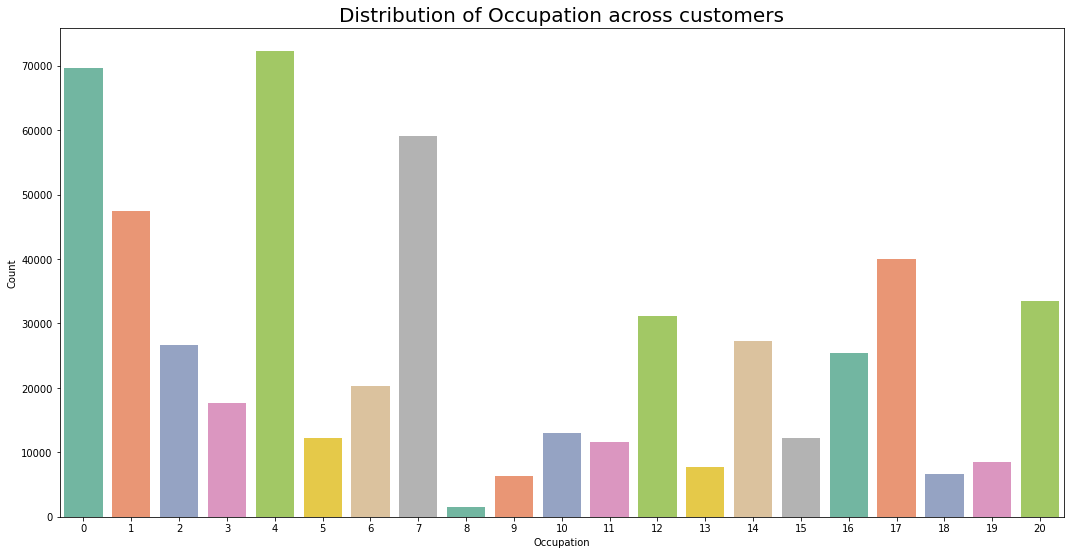

In [ ]:
palette=sns.color_palette("Set2")

plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(data['Occupation'], palette = palette)
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

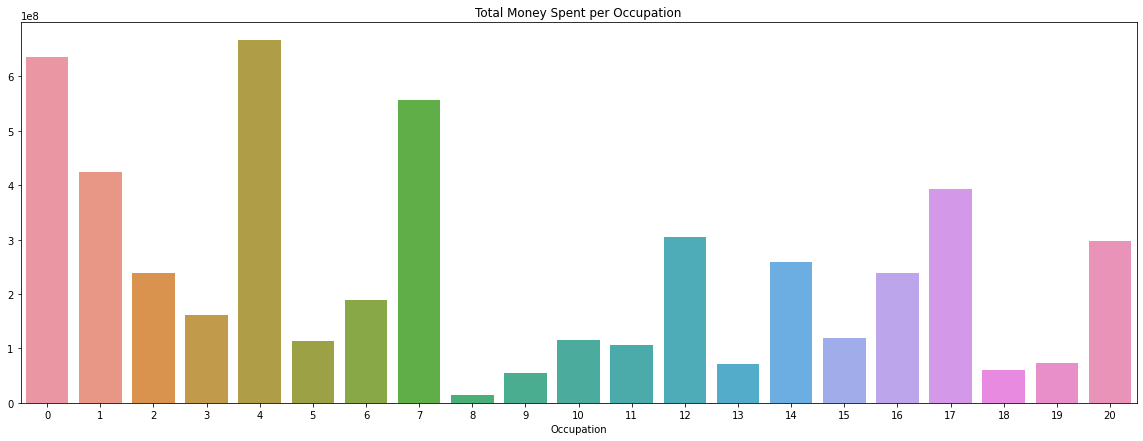

In [ ]:
spent_by_occ = data.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

#### City Category

In [ ]:
# Distinct Values in City Category
list1 = []
for i in table.find().distinct('City_Category'):
    list1.append(i)
print("Categories in City Category Variable", len(list1))
for i in list1:
  print(i)

Categories in City Category Variable 3
A
C
B


In [ ]:
# Unique Values in City Category

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"City_Category": "{}".format(i)}))

Unique Values: 
A : 147720
C : 171175
B : 231173


In [ ]:
# display all the documents in the collection assignment where specific City Category
for x in list1:
  c1 = table.find({"City_Category": "{}".format(x)},{"User_ID" : 1,
  "Product_ID" : 1, "Gender" : 1,
  "Age" : 1,
  "Occupation" : 1,
  "City_Category" : 1,
  "Stay_In_Current_City_Years" : 1,
  "Marital_Status" : 1,
  "Product_Category_1" : 1,
  "Product_Category_2" : 1,
  "Purchase" : 1, "_id" : 0}).limit(1)
  for crnt in c1:
      print(crnt)

{'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'User_ID': '1000002', 'Product_ID': 'P00285442', 'Gender': 'M', 'Age': '55+', 'Occupation': '16', 'City_Category': 'C', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '7969'}
{'User_ID': '1000004', 'Product_ID': 'P00184942', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '8.0', 'Purchase': '19215'}


In [ ]:
# To check null values in Occupation
table.count_documents({"City_Category" : "none"})

0

In [ ]:
data["City_Category"].mode()[0]

'B'

In [ ]:
data.loc[data['City_Category'] == "B"].Purchase.sum()

2115533605

*Maximum orders and Purchase*  

**City Category : B ~ Purchase : 2115533605** is the category of City where purchase frequency is maximum and maximum purchase

In [ ]:
list2 = []
for i in list1:
  list2.append(data.loc[data['City_Category'] == "{}".format(i)].Purchase.sum())

In [ ]:
res2 = dict(zip(list1,list2))
for k, v in res2.items():
    print(k, ":", v)

A : 1316471661
C : 1663807476
B : 2115533605


In [ ]:
# find the minimum
min(res2.items(), key=lambda x: x[1])

('A', 1316471661)

*Minimum Purchase*  

**City Category : A ~ Purchase : 1316471661** is the category of City where purchase is minimum.

In [ ]:
# find the maximum
max(res2.items(), key=lambda x: x[1])

('B', 2115533605)

In [ ]:
data.City_Category.describe()

count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



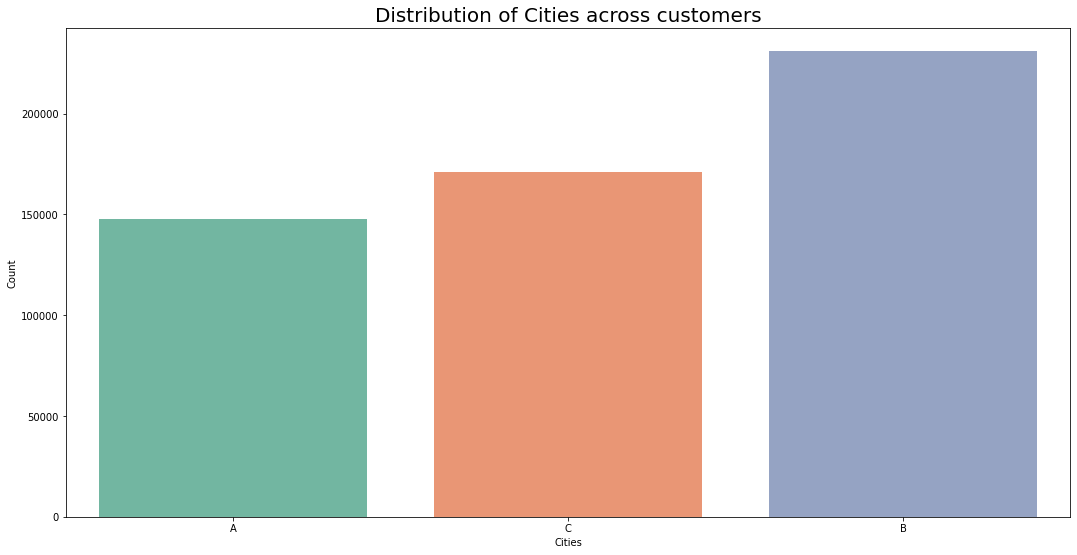

In [ ]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(data['City_Category'], palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

#### Stay in Current City Years

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [ ]:
# Distinct Values in Stay_In_Current_City_Years
list1 = []
for i in table.find().distinct('Stay_In_Current_City_Years'):
    list1.append(i)
print("Categories in Stay_In_Current_City_Years Variable", len(list1))
for i in list1:
  print(i)

Categories in Stay_In_Current_City_Years Variable 5
2
4+
3
1
0


In [ ]:
# display all the documents in the collection assignment where specific Stay_In_Current_City_Years
for x in list1:
  c1 = table.find({"Stay_In_Current_City_Years": "{}".format(x)},{"User_ID" : 1,
  "Product_ID" : 1, "Gender" : 1,
  "Age" : 1,
  "Occupation" : 1,
  "City_Category" : 1,
  "Stay_In_Current_City_Years" : 1,
  "Marital_Status" : 1,
  "Product_Category_1" : 1,
  "Product_Category_2" : 1,
  "Purchase" : 1, "_id" : 0}).limit(1)
  for crnt in c1:
      print(crnt)

{'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'User_ID': '1000002', 'Product_ID': 'P00285442', 'Gender': 'M', 'Age': '55+', 'Occupation': '16', 'City_Category': 'C', 'Stay_In_Current_City_Years': '4+', 'Marital_Status': '0', 'Product_Category_1': '8', 'Product_Category_2': '9.0', 'Purchase': '7969'}
{'User_ID': '1000003', 'Product_ID': 'P00193542', 'Gender': 'M', 'Age': '26-35', 'Occupation': '15', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '2.0', 'Purchase': '15227'}
{'User_ID': '1000005', 'Product_ID': 'P00274942', 'Gender': 'M', 'Age': '26-35', 'Occupation': '20', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '1', 'Product_Category_1': '8', 'Product_Category_2':

In [ ]:
# Unique Values in Stay_In_Current_City_Years

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Stay_In_Current_City_Years": "{}".format(i)}))

Unique Values: 
2 : 101838
4+ : 84726
3 : 95285
1 : 193821
0 : 74398


In [ ]:
# To check null values in Stay_In_Current_City_Years
table.count_documents({"Stay_In_Current_City_Years" : "none"})

0

In [ ]:
data["Stay_In_Current_City_Years"].mode()[0]

'1'

In [ ]:
data.loc[data['Stay_In_Current_City_Years'] == "1"].Purchase.sum()

1792872533

*Maximum orders and Purchase*  

**Stay_In_Current_City_Years : 1 ~ Purchase : 1792872533** is the category of Stay_In_Current_City_Years where purchase frequency is maximum and Purchase is Maximum

In [ ]:
list2 = []
for i in list1:
  list2.append(data.loc[data['Stay_In_Current_City_Years'] == "{}".format(i)].Purchase.sum())

In [ ]:
res3 = dict(zip(list1,list2))
for k, v in res3.items():
    print(k, ":", v)

2 : 949173931
4+ : 785884390
3 : 884902659
1 : 1792872533
0 : 682979229


In [ ]:
# find the minimum
min(res3.items(), key=lambda x: x[1])

('0', 682979229)

*Minimum Purchase*  

**Stay_In_Current_City_Years : 0 ~ Purchase : 682979229** is the category of Stay_In_Current_City_Years where purchase is minimum.

In [ ]:
# find the maximum
max(res3.items(), key=lambda x: x[1])

('1', 1792872533)

In [ ]:
data.Stay_In_Current_City_Years.describe()

count     550068
unique         5
top            1
freq      193821
Name: Stay_In_Current_City_Years, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



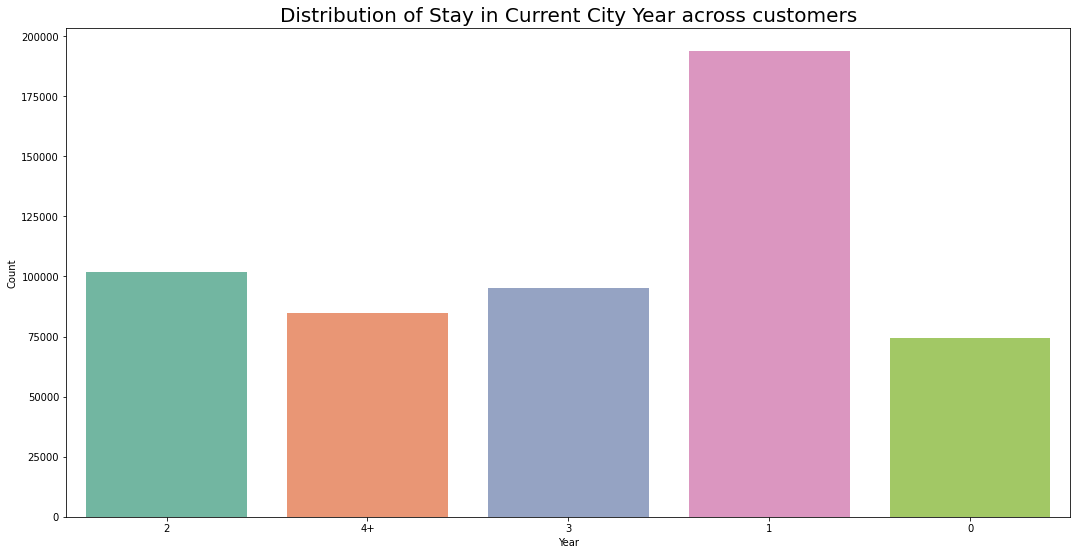

In [ ]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(data['Stay_In_Current_City_Years'], palette = palette)
plt.title('Distribution of Stay in Current City Year across customers', fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### Marital Status

In [ ]:
# Distinct Values in Marital_Status
list1 = []
for i in table.find().distinct('Marital_Status'):
    list1.append(i)
print("Categories in Marital_Status Variable", len(list1))
for i in list1:
  print(i)

Categories in Marital_Status Variable 2
0
1


In [ ]:
# Unique Values in Marital_Status

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Marital_Status": i}))

Unique Values: 
0 : 324731
1 : 225337


In [ ]:
data.Marital_Status.describe()

count    550068.000000
mean          0.409653
std           0.491770
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64

In [ ]:
# display all the documents in the collection Project where Marital Status is 1 (Yes)
c1 = table.find({"Marital_Status": "1"}).limit(5)
for crnt in c1:
    print(crnt)

{'_id': ObjectId('63df65366691a45d4ff782a3'), '': '6', 'User_ID': '1000004', 'Product_ID': 'P00184942', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '8.0', 'Purchase': '19215'}
{'_id': ObjectId('63df65366691a45d4ff782a4'), '': '7', 'User_ID': '1000004', 'Product_ID': 'P00346142', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '15.0', 'Purchase': '15854'}
{'_id': ObjectId('63df65366691a45d4ff782a5'), '': '8', 'User_ID': '1000004', 'Product_ID': 'P0097242', 'Gender': 'M', 'Age': '46-50', 'Occupation': '7', 'City_Category': 'B', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '1', 'Product_Category_1': '1', 'Product_Category_2': '16.0', 'Purchase': '15686'}
{'_id': ObjectId('63df65366691a45d4ff782a6'), '': '9', 'User_ID': 

In [ ]:
# display all the documents in the collection Project where Marital Status is 0 (No)
c1 = table.find({"Marital_Status": "0"}).limit(5)
for crnt in c1:
    print(crnt)

{'_id': ObjectId('63df65366691a45d4ff7829d'), '': '1', 'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'_id': ObjectId('63df65366691a45d4ff7829e'), '': '2', 'User_ID': '1000001', 'Product_ID': 'P00087842', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': '9.0', 'Purchase': '1422'}
{'_id': ObjectId('63df65366691a45d4ff7829f'), '': '0', 'User_ID': '1000001', 'Product_ID': 'P00069042', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '9.0', 'Purchase': '8370'}
{'_id': ObjectId('63df65366691a45d4ff782a0'), '': '3', 'User_ID': '1

In [ ]:
# To check null values in Marital Status
table.count_documents({"Marital_Status" : "none"})

0

In [ ]:
# Values Count in Yes
table.count_documents({"Marital_Status" : "1"})

225337

In [ ]:
Marital_Status_mode = max((table.count_documents({"Marital_Status" :"0"})),table.count_documents({"Marital_Status" : " 1"}))
print("Mode -", "No - ",(Marital_Status_mode))

Mode - No -  324731


In [ ]:
# Values Count in No
table.count_documents({"Marital_Status" : "0"})

324731

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



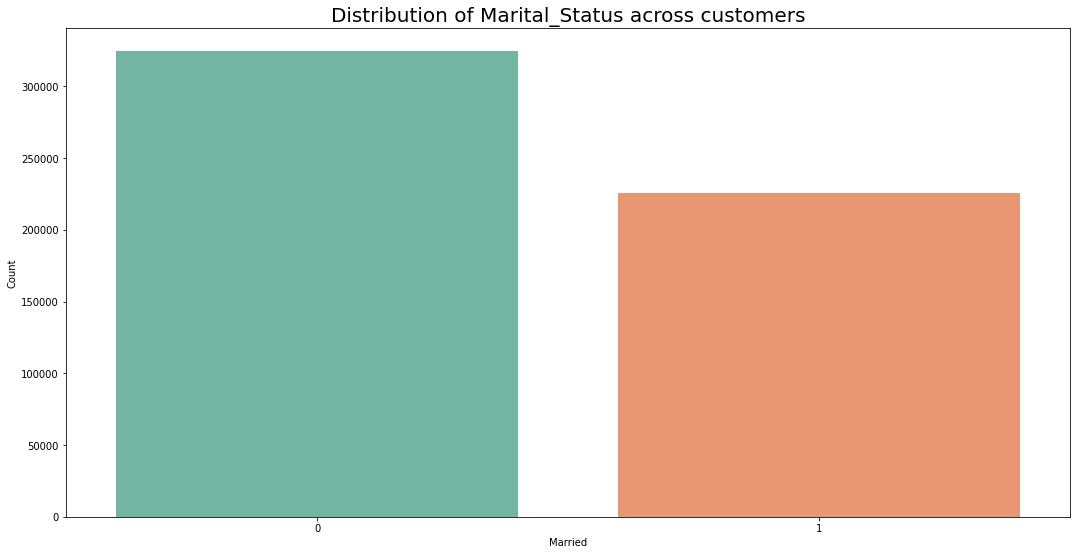

In [ ]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(data['Marital_Status'], palette = palette)
plt.title('Distribution of Marital_Status across customers', fontsize = 20)
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

#### Product Category 1  and 2

In [ ]:
# Distinct Values in Product Category
list1 = []
for i in table.find().distinct('Product_Category_1'):
    list1.append(i)
print("Categories in Product_Category Variable", len(list1))
for i in list1:
  print(i)

Categories in Product_Category Variable 20
1
12
3
8
5
4
2
6
14
11
13
15
7
16
18
10
17
9
20
19


In [ ]:
# display all the documents in the collection assignment where specific Product
for x in range(0,21):
  c1 = table.find({"Product_Category_1": "{}".format(x)},{"User_ID" : 1,
  "Product_ID" : 1, "Gender" : 1,
  "Age" : 1,
  "Occupation" : 1,
  "City_Category" : 1,
  "Stay_In_Current_City_Years" : 1,
  "Marital_Status" : 1,
  "Product_Category_1" : 1,
  "Product_Category_2" : 1,
  "Purchase" : 1, "_id" : 0}).limit(1)
  for crnt in c1:
      print(crnt)

{'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'User_ID': '1000006', 'Product_ID': 'P0096642', 'Gender': 'F', 'Age': '51-55', 'Occupation': '9', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '2', 'Product_Category_2': '3.0', 'Purchase': '13055'}
{'User_ID': '1000001', 'Product_ID': 'P00069042', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '3', 'Product_Category_2': '9.0', 'Purchase': '8370'}
{'User_ID': '1000006', 'Product_ID': 'P00190242', 'Gender': 'F', 'Age': '51-55', 'Occupation': '9', 'City_Category': 'A', 'Stay_In_Current_City_Years': '1', 'Marital_Status': '0', 'Product_Category_1': '4', 'Product_Category_2': '5

In [ ]:
# Unique Values in Product

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Product_Category_1": "{}".format(i)}))

Unique Values: 
1 : 140378
12 : 3947
3 : 20213
8 : 113925
5 : 150933
4 : 11753
2 : 23864
6 : 20466
14 : 1523
11 : 24287
13 : 5549
15 : 6290
7 : 3721
16 : 9828
18 : 3125
10 : 5125
17 : 578
9 : 410
20 : 2550
19 : 1603


In [ ]:
# Distinct Values in Product Category
list1 = []
for i in table.find().distinct('Product_Category_2'):
    list1.append(i)
print("Categories in Product_Category Variable", len(list1))
for i in list1:
  print(i)

Categories in Product_Category Variable 17
6.0
9.0
14.0
2.0
8.0
15.0
16.0
11.0
5.0
3.0
4.0
12.0
10.0
17.0
13.0
7.0
18.0


In [ ]:
# display all the documents in the collection assignment where specific Product
for x in list1:
  c1 = table.find({"Product_Category_2": "{}".format(x)},{"User_ID" : 1,
  "Product_ID" : 1, "Gender" : 1,
  "Age" : 1,
  "Occupation" : 1,
  "City_Category" : 1,
  "Stay_In_Current_City_Years" : 1,
  "Marital_Status" : 1,
  "Product_Category_1" : 1,
  "Product_Category_2" : 1,
  "Purchase" : 1, "_id" : 0}).limit(1)
  for crnt in c1:
      print(crnt)

{'User_ID': '1000001', 'Product_ID': 'P00248942', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2': '6.0', 'Purchase': '15200'}
{'User_ID': '1000001', 'Product_ID': 'P00087842', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': '9.0', 'Purchase': '1422'}
{'User_ID': '1000001', 'Product_ID': 'P00085442', 'Gender': 'F', 'Age': '0-17', 'Occupation': '10', 'City_Category': 'A', 'Stay_In_Current_City_Years': '2', 'Marital_Status': '0', 'Product_Category_1': '12', 'Product_Category_2': '14.0', 'Purchase': '1057'}
{'User_ID': '1000003', 'Product_ID': 'P00193542', 'Gender': 'M', 'Age': '26-35', 'Occupation': '15', 'City_Category': 'A', 'Stay_In_Current_City_Years': '3', 'Marital_Status': '0', 'Product_Category_1': '1', 'Product_Category_2'

In [ ]:
# Unique Values in Product

print("Unique Values: ")
for i in list1:
    print(i,":", table.count_documents({"Product_Category_2": "{}".format(i)}))

Unique Values: 
6.0 : 16466
9.0 : 179331
14.0 : 55108
2.0 : 49217
8.0 : 64088
15.0 : 37855
16.0 : 43255
11.0 : 14134
5.0 : 26235
3.0 : 2884
4.0 : 25677
12.0 : 5528
10.0 : 3043
17.0 : 13320
13.0 : 10531
7.0 : 626
18.0 : 2770


In [ ]:
data.Product_Category_1.describe()

count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [ ]:
data.Product_Category_2.describe()

count    550068.000000
mean          9.576434
std           4.226025
min           2.000000
25%           8.000000
50%           9.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64

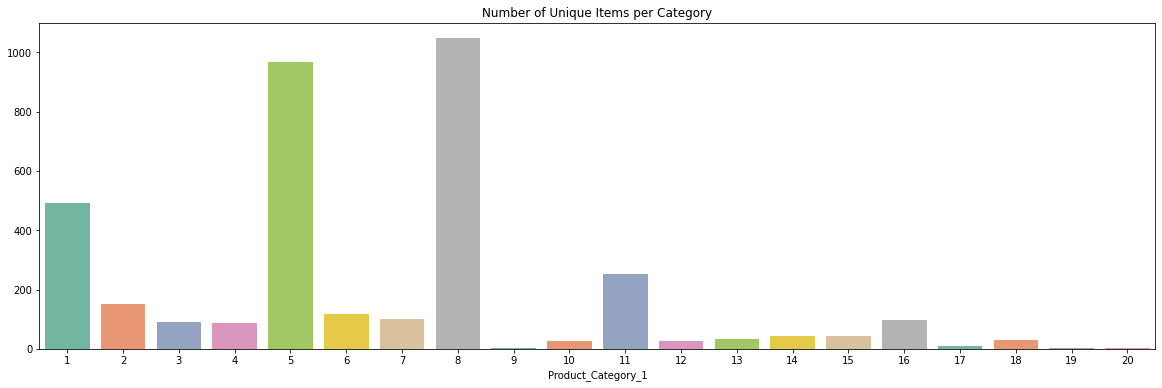

In [ ]:
plt.figure(figsize=(20,6))
prod_by_cat = data.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

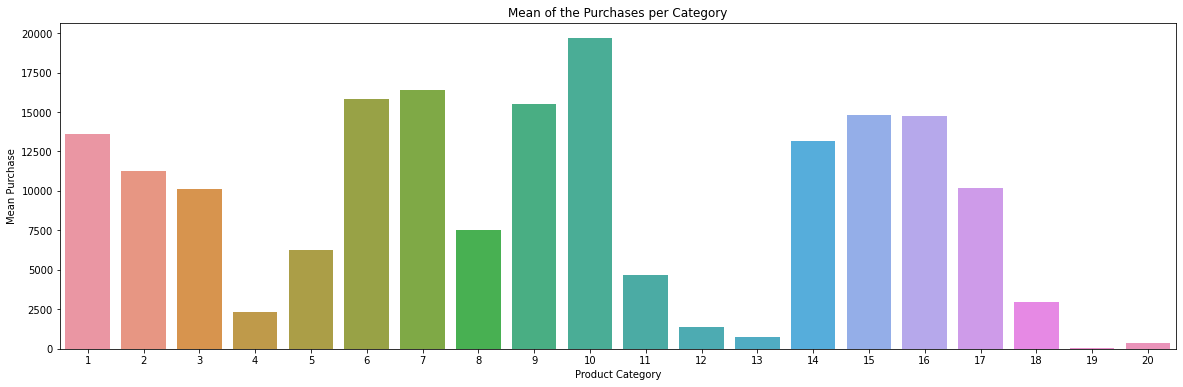

In [ ]:
category = []
mean_purchase = []


for i in data['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(data[data['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



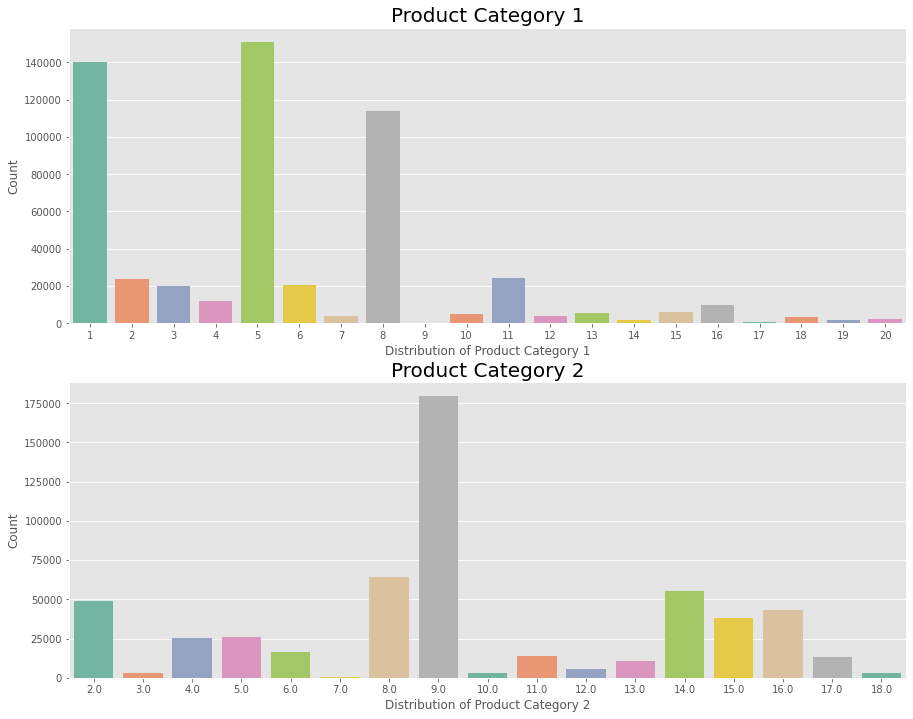

In [ ]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('ggplot')

plt.subplot(4, 1, 1)
sns.countplot(data['Product_Category_1'], palette = palette)
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(4, 1, 2)
sns.countplot(data['Product_Category_2'], palette = palette)
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.show()


#### Purchase

In [ ]:
# To check null values in Purchase
table.count_documents({"Purchase" : "none"})

0

In [ ]:
data.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
# importing important libraries
from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


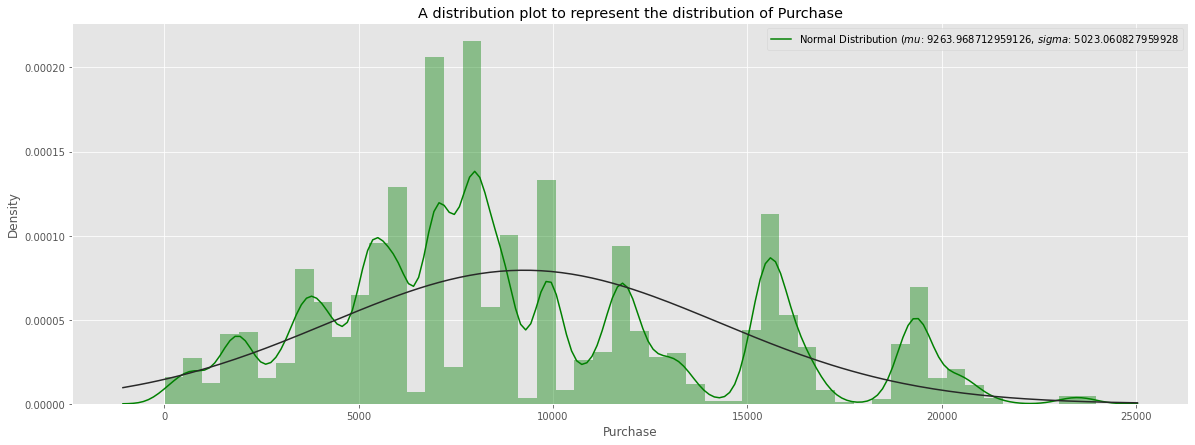

In [ ]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(data['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(data['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

### Info of DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0                               550068 non-null  object
 1   User_ID                     550068 non-null  object
 2   Product_ID                  550068 non-null  object
 3   Gender                      550068 non-null  object
 4   Age                         550068 non-null  object
 5   Occupation                  550068 non-null  object
 6   City_Category               550068 non-null  object
 7   Stay_In_Current_City_Years  550068 non-null  object
 8   Marital_Status              550068 non-null  object
 9   Product_Category_1          550068 non-null  object
 10  Product_Category_2          550068 non-null  object
 11  Purchase                    550068 non-null  object
dtypes: object(12)
memory usage: 50.4+ MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [ ]:
numerical_columns = ["User_ID", "Occupation", "Marital_Status", "Product_Category_1", "Purchase"]

In [ ]:
for i in numerical_columns:
    df["{}".format(i)] = df["{}".format(i)].astype(int)

In [ ]:
float_columns= ["Product_Category_2"]

In [ ]:
for i in float_columns:
    df["{}".format(i)] = df["{}".format(i)].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0                               550068 non-null  object 
 1   User_ID                     550068 non-null  int64  
 2   Product_ID                  550068 non-null  object 
 3   Gender                      550068 non-null  object 
 4   Age                         550068 non-null  object 
 5   Occupation                  550068 non-null  int64  
 6   City_Category               550068 non-null  object 
 7   Stay_In_Current_City_Years  550068 non-null  object 
 8   Marital_Status              550068 non-null  int64  
 9   Product_Category_1          550068 non-null  int64  
 10  Product_Category_2          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 50.4+ MB


### Correlation

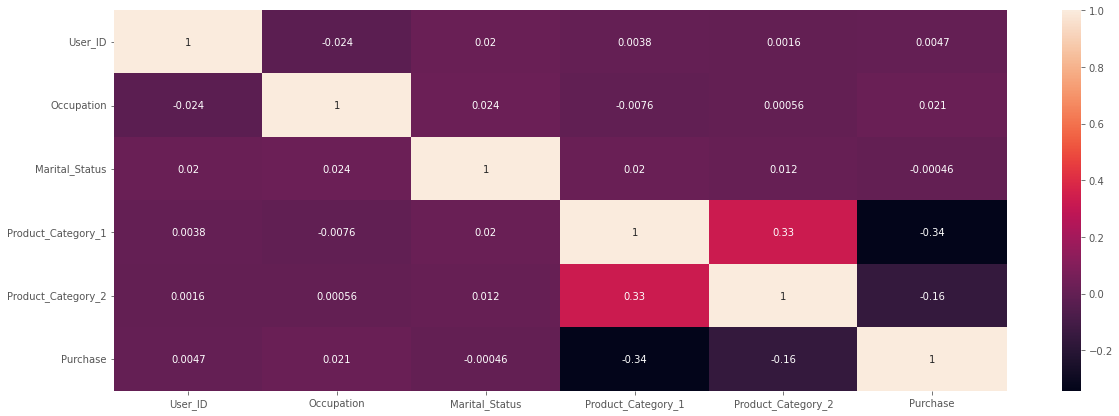

In [ ]:
# Creating a heatmap of correlation matrix
sns.heatmap(data.corr(), annot = True)
plt.show()

# MongoDB to Spark DataFrame

## Importing Library

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
spark = SparkSession.builder.appName('Praxis').getOrCreate()
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import * 
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc,desc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
from pyspark.ml.linalg import Vectors
from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor

## PySpark DF

In [ ]:
client.list_database_names()

['BDSN', 'admin', 'config', 'local', 'test']

In [ ]:
db.list_collection_names()

['Project']

In [ ]:
Data = spark.createDataFrame(df)

In [ ]:
Data.printSchema()

root
 |-- : string (nullable = true)
 |-- User_ID: long (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: long (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: long (nullable = true)
 |-- Product_Category_1: long (nullable = true)
 |-- Product_Category_2: double (nullable = true)
 |-- Purchase: long (nullable = true)



In [ ]:
Data  = Data.drop('')

In [ ]:
Data.printSchema()

root
 |-- User_ID: long (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: long (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: long (nullable = true)
 |-- Product_Category_1: long (nullable = true)
 |-- Product_Category_2: double (nullable = true)
 |-- Purchase: long (nullable = true)



In [ ]:
Data.show(5)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|               6.0|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|               9.0|    1422|
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|               9.0|    8370|
|1000001| P00085442|     F|0-17|        10|            A|                         2|             0|                12|

In [ ]:
Data.dtypes

[('User_ID', 'bigint'),
 ('Product_ID', 'string'),
 ('Gender', 'string'),
 ('Age', 'string'),
 ('Occupation', 'bigint'),
 ('City_Category', 'string'),
 ('Stay_In_Current_City_Years', 'string'),
 ('Marital_Status', 'bigint'),
 ('Product_Category_1', 'bigint'),
 ('Product_Category_2', 'double'),
 ('Purchase', 'bigint')]

In [ ]:
Data.toPandas().isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [ ]:
numeric_features = [t[0] for t in Data.dtypes if ((t[1] == 'double') or (t[1] == "bigint"))]
numeric_features_df= Data.select(numeric_features)
numeric_features_df.describe().toPandas()

,summary,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,count,550068,550068,550068,550068,550068,550068
1,mean,1003028.8424013031,8.076706879876669,0.40965298835780306,5.404270017525106,9.576434186318782,9263.968712959126
2,stddev,1727.591585530903,6.522660487341773,0.491770126317329,3.9362113692013887,4.22602517497174,5023.065393820582
3,min,1000001,0,0,1,2.0,12
4,max,1006040,20,1,20,18.0,23961


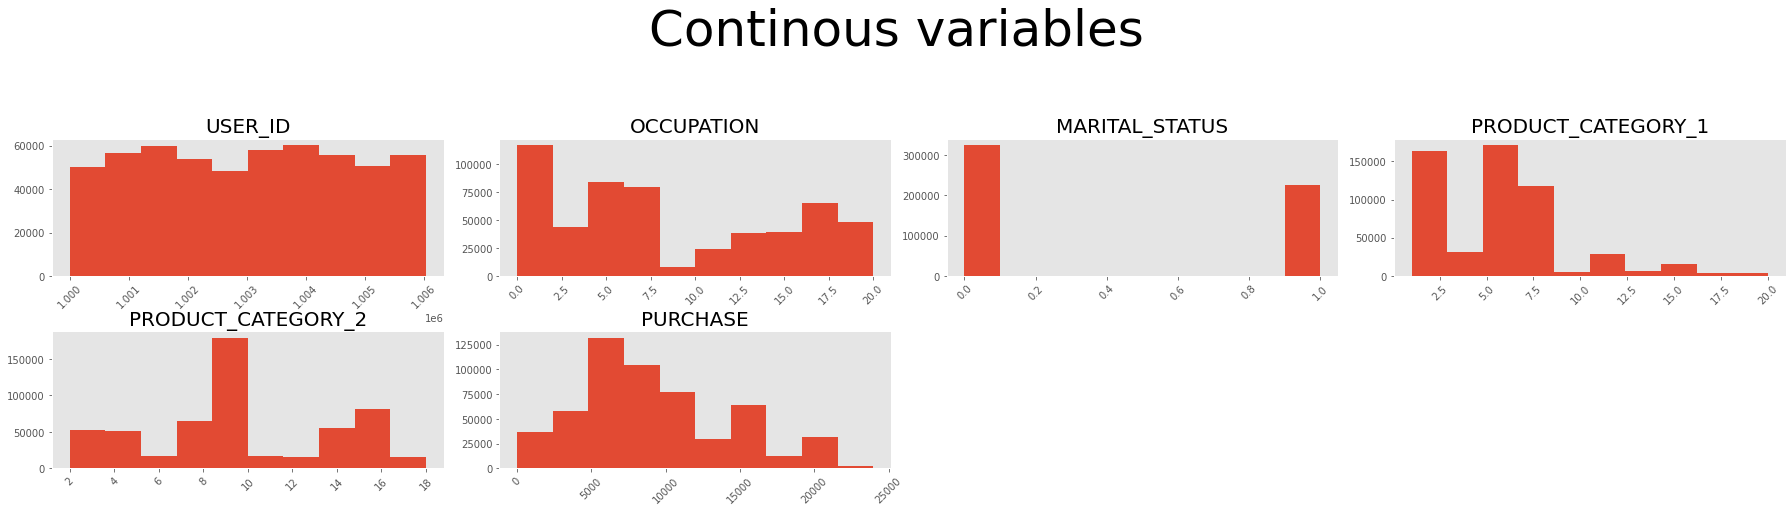

In [ ]:
fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Continous variables", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(Data.toPandas().describe().columns, range(1,17)):
    ax = fig.add_subplot(5,4,num)
    ax.hist(Data.toPandas()[col])
     
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()

## Dropping irrelevant features

In [ ]:
Data  = Data.drop('User_ID')

In [ ]:
Data  = Data.drop('Product_ID')

In [ ]:
Data.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: long (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: long (nullable = true)
 |-- Product_Category_1: long (nullable = true)
 |-- Product_Category_2: double (nullable = true)
 |-- Purchase: long (nullable = true)



In [ ]:
Data.columns

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Purchase']

## String Indexer

In [ ]:
# we have two categorical varibales Gender
# indexing all categorical columns in the dataset

GenderIndexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
AgeIndexer = StringIndexer(inputCol="Age", outputCol="AgeIndex")
City_CategoryIndexer = StringIndexer(inputCol="City_Category", outputCol="City_CategoryIndex")
Stay_In_Current_City_YearsIndexer = StringIndexer(inputCol="Stay_In_Current_City_Years", outputCol="Stay_In_Current_City_YearsIndex")

In [ ]:
Data.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+
|     F|0-17|        10|            A|                         2|             0|                 1|               6.0|   15200|
|     F|0-17|        10|            A|                         2|             0|                12|               9.0|    1422|
|     F|0-17|        10|            A|                         2|             0|                 3|               9.0|    8370|
|     F|0-17|        10|            A|                         2|             0|                12|              14.0|    1057|
|     M| 55+|        16|            C|                        4+|             0|                 8|     

In [ ]:
Data_StringIndexer = City_CategoryIndexer.fit(AgeIndexer.fit(GenderIndexer.fit(Data).transform(Data)).transform(GenderIndexer.fit(Data).transform(Data))).transform(AgeIndexer.fit(GenderIndexer.fit(Data).transform(Data)).transform(GenderIndexer.fit(Data).transform(Data)))

In [ ]:
Data_StringIndexer.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|GenderIndex|AgeIndex|City_CategoryIndex|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+
|     F|0-17|        10|            A|                         2|             0|                 1|               6.0|   15200|        1.0|     6.0|               2.0|
|     F|0-17|        10|            A|                         2|             0|                12|               9.0|    1422|        1.0|     6.0|               2.0|
|     F|0-17|        10|            A|                         2|             0|                 3|               9.0|    8370|        1.0|     6.0|            

In [ ]:
Data_StringIndexer2 = Stay_In_Current_City_YearsIndexer.fit(Data_StringIndexer).transform(Data_StringIndexer)

In [ ]:
Data_StringIndexer2.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|GenderIndex|AgeIndex|City_CategoryIndex|Stay_In_Current_City_YearsIndex|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+
|     F|0-17|        10|            A|                         2|             0|                 1|               6.0|   15200|        1.0|     6.0|               2.0|                            1.0|
|     F|0-17|        10|            A|                         2|             0|                12|               9.0|    1422|        1.0|     6.0|               2.0|                            1.0|


## Assembler

In [ ]:
F_assembler = VectorAssembler(inputCols=['GenderIndex',
 'AgeIndex',
 'Occupation',
 'City_CategoryIndex',
 'Stay_In_Current_City_YearsIndex',
 'Marital_Status',
 'Product_Category_1','Product_Category_2'],outputCol='features')

In [ ]:
Data_assembler = F_assembler.transform(Data_StringIndexer2)

In [ ]:
Data_assembler.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|GenderIndex|AgeIndex|City_CategoryIndex|Stay_In_Current_City_YearsIndex|            features|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+
|     F|0-17|        10|            A|                         2|             0|                 1|               6.0|   15200|        1.0|     6.0|               2.0|                            1.0|[1.0,6.0,10.0,2.0...|
|     F|0-17|        10|            A|                         2|             0|                12|               9.

## Standardisation

In [ ]:
# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler

# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

# Fit the DataFrame to the scaler
scaler = standardScaler.fit(Data_assembler)

# Transform the data in `df` with the scaler
scaled_df = scaler.transform(Data_assembler)

In [ ]:
scaled_df.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+--------------------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|GenderIndex|AgeIndex|City_CategoryIndex|Stay_In_Current_City_YearsIndex|            features|     features_scaled|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+--------------------+
|     F|0-17|        10|            A|                         2|             0|                 1|               6.0|   15200|        1.0|     6.0|               2.0|                            1.0|[1.0,6.0,10.0,2.0...|[2.31908001899471...|
|     F|0-17|        10|        

## Train-Test Split

In [ ]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.8,.2],seed=1234)

In [ ]:
train_data.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+--------------------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|GenderIndex|AgeIndex|City_CategoryIndex|Stay_In_Current_City_YearsIndex|            features|     features_scaled|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+--------------------+
|     F|0-17|         0|            A|                         2|             0|                 1|               2.0|   12113|        1.0|     6.0|               2.0|                            1.0|[1.0,6.0,0.0,2.0,...|[2.31908001899471...|
|     F|0-17|         0|        

In [ ]:
test_data.show(5)

+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+--------------------+
|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Purchase|GenderIndex|AgeIndex|City_CategoryIndex|Stay_In_Current_City_YearsIndex|            features|     features_scaled|
+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+--------+-----------+--------+------------------+-------------------------------+--------------------+--------------------+
|     F|0-17|         0|            A|                         2|             0|                 3|               4.0|   10807|        1.0|     6.0|               2.0|                            1.0|[1.0,6.0,0.0,2.0,...|[2.31908001899471...|
|     F|0-17|         0|        

## Building ML Models

### Linear Regression

In [ ]:
lr = LinearRegression(labelCol="Purchase", featuresCol="features_scaled", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the data to the model
linearModel = lr.fit(train_data)

In [ ]:
# Generate predictions
predicted = linearModel.transform(test_data)   

In [ ]:
# Get the RMSE
print("RMSE:", linearModel.summary.rootMeanSquaredError)
# Get the R2
print("R^2:", linearModel.summary.r2)

RMSE: 4705.371320576718
R^2: 0.12153237067932543


### Random Forest

In [ ]:
rf = RandomForestRegressor(labelCol="Purchase", featuresCol="features_scaled")

In [ ]:
# Fit the data to the model
rfmodel = rf.fit(train_data)

In [ ]:
# Generate predictions
predicted_RF = rfmodel.transform(test_data)   

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

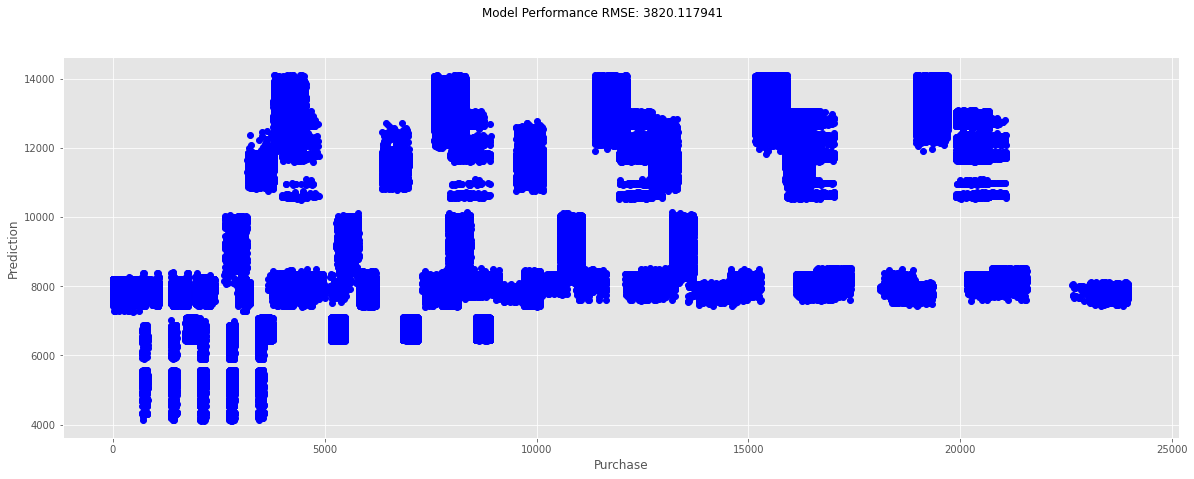

In [ ]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predicted_RF)
rfPred = rfmodel.transform(scaled_df)
rfResult = rfPred.toPandas()
plt.plot(rfResult.Purchase, rfResult.prediction, 'bo')
plt.xlabel('Purchase')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [ ]:
print("RMSE: ", rmse)

RMSE:  3820.1179413368436


### Gradient Boost Regressor

In [ ]:
gbr = GBTRegressor(labelCol="Purchase", featuresCol="features_scaled", maxDepth = 11)

In [ ]:
# Fit the data to the model
gbrmodel = gbr.fit(train_data)

In [ ]:
predicted_GBR = gbrmodel.transform(test_data)   

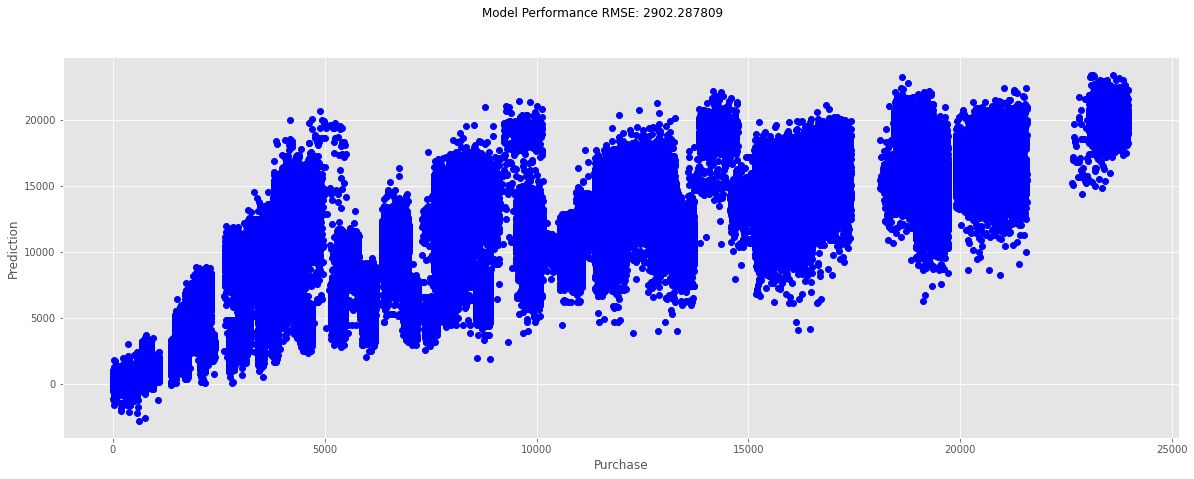

In [ ]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="rmse")
rmse1 = evaluator.evaluate(predicted_GBR)
rfPred = gbrmodel.transform(scaled_df)
rfResult = rfPred.toPandas()
plt.plot(rfResult.Purchase, rfResult.prediction, 'bo')
plt.xlabel('Purchase')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse1)
plt.show()

In [ ]:
print("RMSE: ", rmse1)

RMSE:  2902.2878086091832
